# Police killing of civilians in the US in from January 2015 to June 2015

This analysis is part of the dataquest guided project to analyse real data. The first dataset on police killings used in this project are provided by the <a href="http://fivethirtyeight.com/">FiveThirtyEight</a> team and can be found <a href="https://github.com/fivethirtyeight/data/tree/master/police-killings">here</a>. The second dataset which is state level data can be found <a href="https://www.census.gov/popest/data/state/asrh/2015/SCPRC-EST2015-18+POP-RES.html"> here </a>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
police_killings = pd.read_csv("police_killings.csv", encoding='ISO-8859-1')
print(police_killings.columns)
print(police_killings.ix[0:4])

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')
                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \


## Shootings By Race

In [3]:
blacks_killed = police_killings["raceethnicity"].value_counts()
print(blacks_killed.values)
list(blacks_killed.index)

[236 135  67  15  10   4]


['White',
 'Black',
 'Hispanic/Latino',
 'Unknown',
 'Asian/Pacific Islander',
 'Native American']

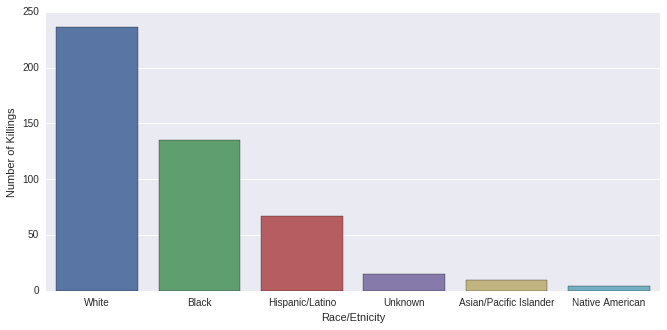

In [4]:
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(1,1,1)
sns.barplot(y=police_killings["raceethnicity"].value_counts(), x=list(blacks_killed.index), ax=ax1)
ax1.set(ylabel="Number of Killings", xlabel="Race/Etnicity")
plt.show()

### Killing Pattern
The fact that whites americans killed in the time frame almost doubles the amount of blacks killed is revealing. The proportion of Hispanics/Latinos in the American population is about 3 points more than blacks, however, black killings by police is more than double for blacks. 

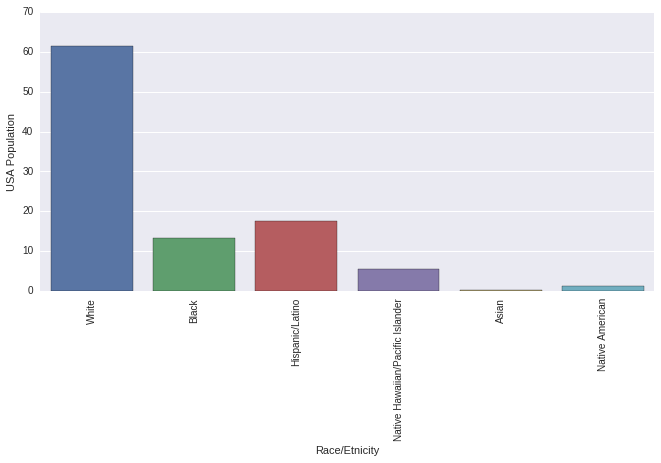

In [5]:
cols = ["White", "Black", "Hispanic/Latino", "Native Hawaiian/Pacific Islander", 
        "Asian", "Native American"]
vals = [61.6, 13.3, 17.6, 5.6, 0.2, 1.2]
fig1 = plt.figure(figsize=(11,5))
ax2 = fig1.add_subplot(1,1,1)
sns.barplot(y=vals, x=cols)
ax2.set(ylabel="USA Population", xlabel="Race/Etnicity")
plt.xticks(rotation=90)
plt.show()

## Shootings By Regional Income

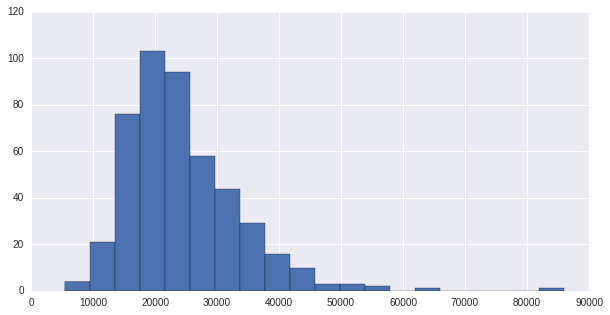

In [6]:
income =  police_killings['p_income'][police_killings['p_income'] != '-'].astype(int)
income.hist(figsize=(10,5), bins=20)

The 'p_income' column(personal income) of the dataset created by the FiveThirtyEight team contains the median tract-level personal income per census tract. This varies from the median US personal income. 

The histogram tells us that majority of police killings(about 75%) occur in neighbourhoods with lower median personal income(<< $30,000)

In [7]:
state_pop = pd.read_csv("state_population.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


##  Shootings By State

In [8]:
# Pandas Series where the index is the code for each state, and the values 
# are the numbers of police killings in each state.
counts = police_killings["state_fp"].value_counts()
#columns=["STATE", "Shootings"]

states = pd.DataFrame({"STATE": counts.index, "Shootings":counts.values})

In [9]:
states.head()

,STATE,Shootings
0,6,74
1,48,47
2,12,29
3,4,25
4,40,22


In [10]:
# merge state_pop and states on the STATE label
states = state_pop.merge(states, on='STATE')

# Create a new column in states called pop_millions
states['pop_millions'] = states["POPESTIMATE2015"] / 1000000
# rate of police killings per one million people in each state
states['rate'] = states["Shootings"] / states["pop_millions"]
states.head(20)

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,Shootings,pop_millions,rate
0,40,3,6,1,Alabama,4858979,3755483,77.3,8,4.858979,1.646436
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
3,40,3,7,5,Arkansas,2978204,2272904,76.3,4,2.978204,1.343091
4,40,4,9,6,California,39144818,30023902,76.7,74,39.144818,1.890416
5,40,4,8,8,Colorado,5456574,4199509,77.0,12,5.456574,2.199182
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
7,40,3,5,10,Delaware,945934,741548,78.4,2,0.945934,2.114312
8,40,3,5,11,District of Columbia,672228,554121,82.4,1,0.672228,1.487591
9,40,3,5,12,Florida,20271272,16166143,79.7,29,20.271272,1.430596


In [11]:
rates_asc = states.sort(columns=['rate'], ascending=[1])

/home/chiedu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


From the analysis we can see that Connecticut and Oklahoma have the least and most police shootings per million with rates of 0.278/mill and 5.625/mill. This means the police are more likely to shoot people in Oklahoma and people are least likely to be shot in Connecticut by the police.

## State By State Differences

Why do some states have a much higher rate of police killings than others?

In [12]:
police_killings.shape

(467, 34)

Remove all rows in  share_hispanic, share_black and share_white columns that contain non-numeric characters('-')

In [13]:
pk = police_killings[police_killings["share_hispanic"] != '-']
pk = police_killings[police_killings["share_black"] != '-']
pk = police_killings[police_killings["share_white"] != '-']
pk[["share_white", "share_black", "share_hispanic"]].astype(float)
pk.shape

(465, 34)

Sort and slice the police killings data by top 10 and bottom 10 killing rates per million

In [14]:
pk_low = pk[pk["state_fp"].isin(rates_asc["STATE"].iloc[0:10])]
pk_high = pk[pk["state_fp"].isin(rates_asc["STATE"].tail(10))]

In [15]:
print(pk_low["state"].unique())
print(pk_high["state"].unique())

['WI' 'OH' 'NH' 'MA' 'PA' 'IA' 'NY' 'IL' 'CT' 'ME']
['LA' 'AZ' 'NE' 'OK' 'NM' 'ID' 'CO' 'HI' 'AK' 'DE']


Find the mean of the etnicities for the top 10 and bottom 10 states per police killings 

In [16]:
pk_low_mean = pk_low[["share_white", "share_black", "share_hispanic"]].astype(float).mean()
pk_high_mean = pk_high[["share_white", "share_black", "share_hispanic"]].astype(float).mean()


In [17]:
print(pk_low_mean)
print(pk_high_mean)

share_white       60.132727
share_black       21.610909
share_hispanic    12.994545
dtype: float64
share_white       55.652174
share_black       11.532609
share_hispanic    20.693478
dtype: float64


Comparison of the mean values for etnicity share in the top 10 states with lowest shooting rates versus the states with top 10 killing rates, showed that states with higher killing rates had lower proportion of blacks with regards to whites and hispanic. It also seems like states with low shooting rates have almost double the population of blacks to hispanic.